# 1. Data Collection and Preparation:

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [ ]:
cs_df = pd.read_csv("https://uni-koeln.sciebo.de/s/59LhTdJ9c8tYgmn/download?path=%2F&files=charging_sessions.csv", index_col=0)

In [ ]:
ccs_df = cs_df.copy()

In [ ]:
ccs_df.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs'],
      dtype='object')

In [ ]:
ccs_df.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [ ]:
ccs_df.describe()

,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,49187.000000
mean,11.787916,1.472656,1800.494582
std,10.314789,0.499256,2617.548614
min,0.501000,1.000000,1.000000
25%,5.097000,1.000000,431.000000
50%,9.140000,1.000000,818.000000
75%,14.183000,2.000000,1805.000000
max,108.797242,2.000000,19923.000000


In [ ]:
ccs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66450 entries, 0 to 10087
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   timezone          66450 non-null  object 
 10  userID            49187 non-null  float64
 11  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.6+ MB


In [ ]:
# Convert time fields to datetime type
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'])
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'])
ccs_df['doneChargingTime'] = pd.to_datetime(ccs_df['doneChargingTime'])

ccs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66450 entries, 0 to 10087
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                66450 non-null  object             
 1   connectionTime    66450 non-null  datetime64[ns, UTC]
 2   disconnectTime    66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 4   kWhDelivered      66450 non-null  float64            
 5   sessionID         66450 non-null  object             
 6   siteID            66450 non-null  int64              
 7   spaceID           66450 non-null  object             
 8   stationID         66450 non-null  object             
 9   timezone          66450 non-null  object             
 10  userID            49187 non-null  float64            
 11  userInputs        49187 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(2), int64(1), object(6)
memory

In [ ]:
ccs_df.isnull().sum()

id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4088
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17263
userInputs          17263
dtype: int64

In [ ]:
ccs_df = ccs_df.dropna(subset=['doneChargingTime']).copy()  # Remove rows with missing 'doneChargingTime'
ccs_df['isRegisteredUser'] = ccs_df['userID'].notna().astype(int)  # Keep rows with missing 'userID' and 'userInputs', add a flag column to distinguish between registered and unregistered users for behavior pattern analysis

In [ ]:
# Handle erroneous data
# Check if there are records where kWhDelivered is negative
invalid_kwh = ccs_df[ccs_df['kWhDelivered'] < 0]
print(f"Number of records with negative kWhDelivered: {len(invalid_kwh)}")

# Check if disconnectTime is earlier than connectionTime
invalid_time_order = ccs_df[ccs_df['disconnectTime'] < ccs_df['connectionTime']]
print(f"Number of records with disconnectTime earlier than connectionTime: {len(invalid_time_order)}")

Number of records with negative kWhDelivered: 0
Number of records with disconnectTime earlier than connectionTime: 0


In [ ]:
# Check the number of duplicated rows where all columns are identical
num_duplicates = ccs_df.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 1412


In [ ]:
# Remove duplicate rows, keeping only the first occurrence
ccs_df = ccs_df.drop_duplicates()

len(ccs_df)

60950

In [ ]:
#processes the userInputs column to convert string representations into lists of dictionaries, expands the first dictionary in each list into separate columns, and then merges these expanded columns back into the original DataFrame
ccs_df['userInputs'] = ccs_df['userInputs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ccs_df['userInputs'] = ccs_df['userInputs'].apply(lambda x: x if isinstance(x, list) else [])

user_input_expanded = ccs_df['userInputs'].apply(lambda x: x[0] if len(x) > 0 else {}).apply(pd.Series)

ccs_df = pd.concat([ccs_df, user_input_expanded], axis=1)

# Remove duplicate userID columns
ccs_df = ccs_df.loc[:, ~ccs_df.columns.duplicated()]

# Save the cleaned data to a new CSV file
ccs_df.to_csv('ccs_cleaned.csv', index=False)
print("Data cleaning completed and saved as 'ccs_cleaned.csv'")

# Check the cleaned data
print(ccs_df.head())

Data cleaning completed and saved as 'ccs_cleaned.csv'
                         id            connectionTime  \
0  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1  5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50+00:00   
2  5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35+00:00   
3  5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58+00:00   
4  5e23b149f9af8b5fe4b973d3 2020-01-02 14:00:01+00:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1 2020-01-02 22:38:21+00:00 2020-01-02 20:18:05+00:00        33.097   
2 2020-01-03 00:39:22+00:00 2020-01-02 16:35:06+00:00         6.521   
3 2020-01-02 16:38:39+00:00 2020-01-02 15:18:45+00:00         2.355   
4 2020-01-02 22:08:40+00:00 2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_193_825_2020-01-02

In [ ]:
ccs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60950 entries, 0 to 8674
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  60950 non-null  object             
 1   connectionTime      60950 non-null  datetime64[ns, UTC]
 2   disconnectTime      60950 non-null  datetime64[ns, UTC]
 3   doneChargingTime    60950 non-null  datetime64[ns, UTC]
 4   kWhDelivered        60950 non-null  float64            
 5   sessionID           60950 non-null  object             
 6   siteID              60950 non-null  int64              
 7   spaceID             60950 non-null  object             
 8   stationID           60950 non-null  object             
 9   timezone            60950 non-null  object             
 10  userID              44644 non-null  float64            
 11  userInputs          60950 non-null  object             
 12  isRegisteredUser    60950 non-null  in

In [ ]:
wb_df = pd.read_csv('https://uni-koeln.sciebo.de/s/59LhTdJ9c8tYgmn/download?path=%2F&files=weather_burbank_airport.csv')

print(wb_df.head())
print(wb_df.shape)
print(wb_df.info())
print(wb_df.isnull().sum())

      city            timestamp  temperature  cloud_cover  \
0  Burbank  2018-01-01 08:53:00          9.0         33.0   
1  Burbank  2018-01-01 09:53:00          9.0         33.0   
2  Burbank  2018-01-01 10:53:00          9.0         21.0   
3  Burbank  2018-01-01 11:53:00          9.0         29.0   
4  Burbank  2018-01-01 12:53:00          8.0         33.0   

  cloud_cover_description  pressure  windspeed  precipitation  \
0                    Fair    991.75        9.0            0.0   
1                    Fair    992.08        0.0            0.0   
2                    Haze    992.08        0.0            0.0   
3           Partly Cloudy    992.08        0.0            0.0   
4                    Fair    992.08        0.0            0.0   

   felt_temperature  
0               8.0  
1               9.0  
2               9.0  
3               9.0  
4               8.0  
(29244, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 c

In [ ]:
# Handle missing values
# Fill missing values in numeric columns with the median
num_cols = ['temperature', 'cloud_cover', 'pressure', 'windspeed', 'felt_temperature']
wb_df[num_cols] = wb_df[num_cols].fillna(wb_df[num_cols].median())

# Fill missing values in categorical columns with 'Unknown'
wb_df['cloud_cover_description'] = wb_df['cloud_cover_description'].fillna('Unknown')

# Check if there are any missing values left
print(wb_df.isnull().sum())

city                       0
timestamp                  0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
dtype: int64


In [ ]:
#Convert timestamp to datetime
wb_df['timestamp'] = pd.to_datetime(wb_df['timestamp'], errors='coerce')

In [ ]:
# Remove duplicate rows
wb_df.drop_duplicates(inplace=True)

# Check for remaining duplicate rows
print(f"Number of duplicate rows: {wb_df.duplicated().sum()}")


Number of duplicate rows: 0


In [ ]:
# Convert column names to lowercase and replace spaces with underscores
wb_df.columns = wb_df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Save the cleaned data to a new CSV file
wb_df.to_csv('weather_burbank_airport_cleaned.csv', index=False)
print("Data cleaning completed and saved as 'weather_burbank_airport_cleaned.csv'")

# Check the cleaned data
print(wb_df.head())

Data cleaning completed and saved as 'weather_burbank_airport_cleaned.csv'
      city           timestamp  temperature  cloud_cover  \
0  Burbank 2018-01-01 08:53:00          9.0         33.0   
1  Burbank 2018-01-01 09:53:00          9.0         33.0   
2  Burbank 2018-01-01 10:53:00          9.0         21.0   
3  Burbank 2018-01-01 11:53:00          9.0         29.0   
4  Burbank 2018-01-01 12:53:00          8.0         33.0   

  cloud_cover_description  pressure  windspeed  precipitation  \
0                    Fair    991.75        9.0            0.0   
1                    Fair    992.08        0.0            0.0   
2                    Haze    992.08        0.0            0.0   
3           Partly Cloudy    992.08        0.0            0.0   
4                    Fair    992.08        0.0            0.0   

   felt_temperature  
0               8.0  
1               9.0  
2               9.0  
3               9.0  
4               8.0  


In [ ]:
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29244 non-null  float64       
 3   cloud_cover              29244 non-null  float64       
 4   cloud_cover_description  29244 non-null  object        
 5   pressure                 29244 non-null  float64       
 6   windspeed                29244 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29244 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


# 2. Descriptive Analytics:
## (a) Temporal Patterns and Seasonality:

In [ ]:
# Ensure that connectionTime is in datetime format
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')

# Check if there are any values that cannot be converted to datetime
if ccs_df['connectionTime'].isna().sum() > 0:
    print(f"Number of invalid connectionTime values: {ccs_df['connectionTime'].isna().sum()}")
    ccs_df = ccs_df.dropna(subset=['connectionTime'])  # Remove rows with invalid values

# Extract time-related dimensions
ccs_df['hour'] = ccs_df['connectionTime'].dt.hour         # Hour of the day
ccs_df['weekday'] = ccs_df['connectionTime'].dt.weekday   # Day of the week (0=Monday, 6=Sunday)
ccs_df['quarter'] = ccs_df['connectionTime'].dt.quarter   # Quarter of the year

# Count the number of charging sessions for each time dimension
hourly_counts = ccs_df.groupby('hour').size()             # Count by hour
weekday_counts = ccs_df.groupby('weekday').size()         # Count by weekday
quarterly_counts = ccs_df.groupby('quarter').size()       # Count by quarter

# Output the statistics
print("Hourly Counts:")
print(hourly_counts)

print("\nWeekly Counts:")
print(weekday_counts)

print("\nQuarterly Counts:")
print(quarterly_counts)


Hourly Counts:
hour
0     1922
1     1665
2     1277
3      940
4      690
5      416
6      233
7      154
8       98
9       62
10      95
11     311
12    1585
13    5579
14    9353
15    9432
16    6304
17    4204
18    3069
19    3185
20    3029
21    2560
22    2405
23    2382
dtype: int64

Weekly Counts:
weekday
0    10543
1    11807
2    11710
3    11562
4     9859
5     3080
6     2389
dtype: int64

Quarterly Counts:
quarter
1    14408
2    14230
3    17083
4    15229
dtype: int64


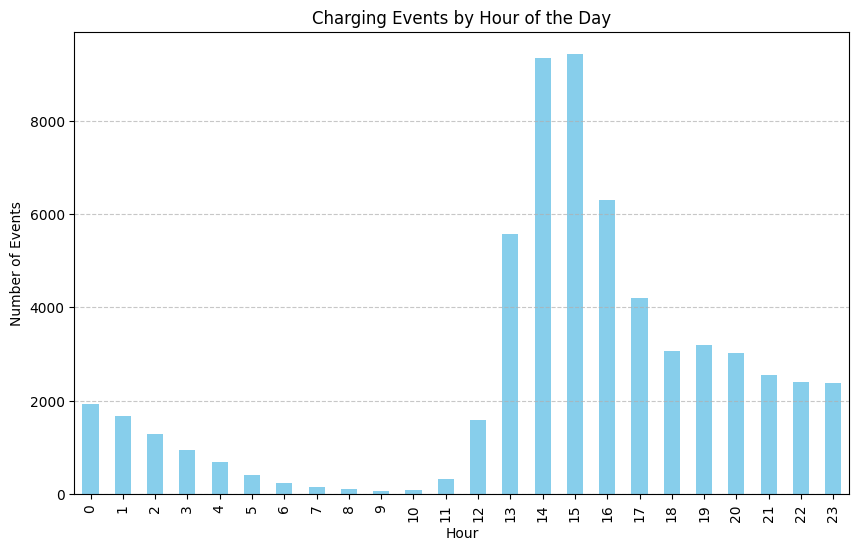

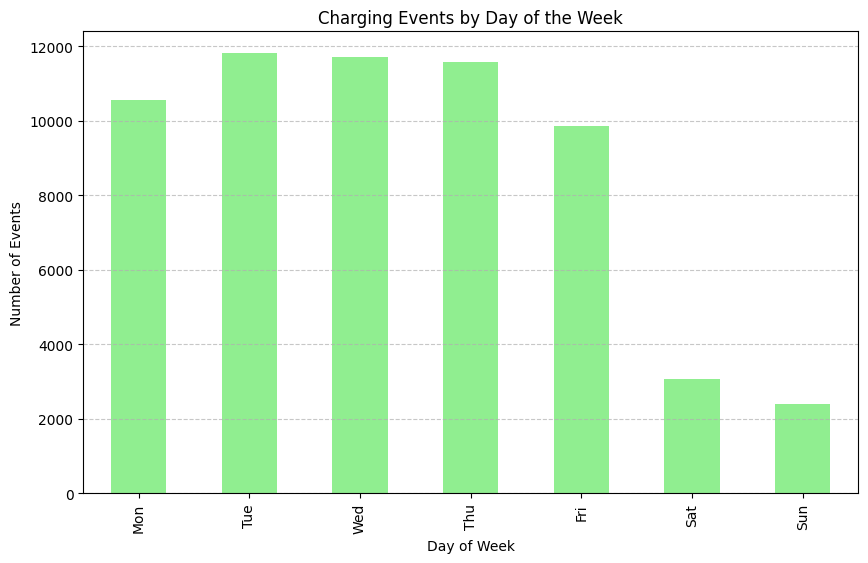

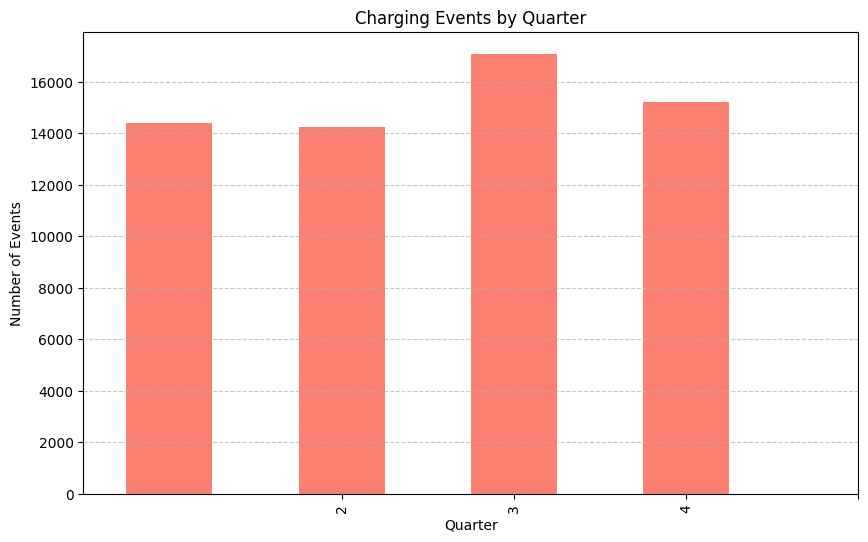

In [ ]:
# ---------------- Daily Pattern ----------------
hourly_counts = ccs_df.groupby('hour').size()  # Count by hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Charging Events by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.xticks(range(0, 24))  # Ensure x-axis shows all hours from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------- Weekly Pattern ----------------
weekday_counts = ccs_df.groupby('weekday').size()  # Count by day of the week
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='lightgreen')
plt.title('Charging Events by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Replace numeric labels with day names
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------- Seasonal Pattern ----------------
quarterly_counts = ccs_df.groupby('quarter').size()  # Count by quarter
plt.figure(figsize=(10, 6))
quarterly_counts.plot(kind='bar', color='salmon')
plt.title('Charging Events by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Events')
plt.xticks(range(1, 5))  # Ensure x-axis shows quarters from 1 to 4
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Daily Pattern
- Trend: Charging events are lowest in the early morning (6-10 AM) and peak around midday to early afternoon (12-3 PM), then gradually decrease through the evening.
- Explanation: Morning lows align with active vehicle usage during commutes, while the midday peak reflects charging during breaks or midday stops. Evening activity corresponds to vehicles returning home.

### Weekly Pattern
- Trend: Charging events are significantly higher on weekdays (Monday to Frirsday) and decrease toward the weekend, with Saturday and Sunday being the lowest.
- Explanation: Weekday peaks are driven by commuting and work-related vehicle use, while weekend lows reflect reduced vehicle activity and charging.

### Seasonal Pattern
- Trend: Charging events are highest in Q3 (July-September) and relatively stable across Q1 (January-March), Q2 (April-June), and Q4 (October-December).
- Explanation: The Q3 peak may be due to summer travel and increased mobility, while winter months might see more charging due to reduced battery efficiency in colder weather.

## (b) Key Performance Indicators (KPIs):

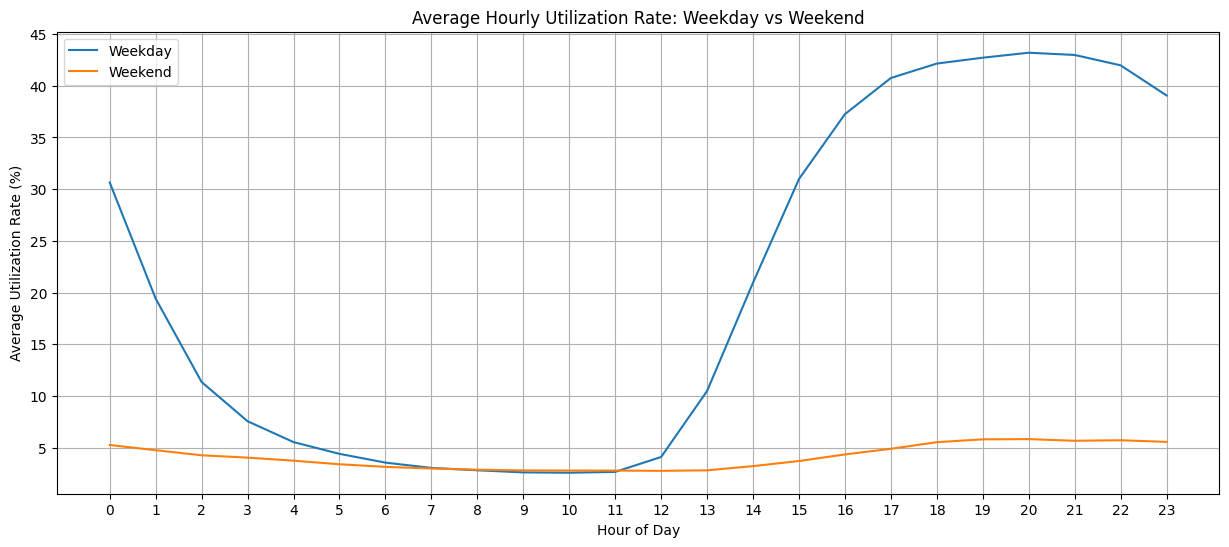

In [ ]:
# Ensure the time columns are in datetime format
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'], errors='coerce')

# Extract the connection and disconnection hours
ccs_df['connection_hour'] = ccs_df['connectionTime'].dt.hour
ccs_df['disconnect_hour'] = ccs_df['disconnectTime'].dt.hour

# Create the date column
ccs_df['date'] = ccs_df['connectionTime'].dt.date

# Mark weekdays and weekends
ccs_df['day_type'] = ccs_df['weekday'].apply(lambda x: 'Weekday' if x <= 4 else 'Weekend')

# Expand each session to cover all the hours the station was occupied, considering cross-day sessions
ccs_df['hours_expanded'] = ccs_df.apply(
    lambda row: list(range(row['connection_hour'], 24)) + list(range(0, row['disconnect_hour'] + 1))  # Handle sessions spanning across days
    if row['disconnect_hour'] < row['connection_hour']
    else list(range(row['connection_hour'], row['disconnect_hour'] + 1)),
    axis=1
)

# Use the explode method to expand the hours_expanded column
expanded_df = ccs_df.explode('hours_expanded')

# Use drop_duplicates to avoid counting the same station multiple times within the same hour
expanded_df = expanded_df.drop_duplicates(subset=['stationID', 'date', 'hours_expanded'])

# Count the number of active stations by date, hour, and day type (weekday/weekend)
hourly_active_stations = expanded_df.groupby(['date', 'hours_expanded', 'day_type'])['stationID'].nunique().reset_index()

# Calculate the utilization rate for each hour
total_stations = ccs_df['stationID'].nunique()
hourly_active_stations['utilization_rate'] = (hourly_active_stations['stationID'] / total_stations) * 100

# Calculate the average utilization rate by hour and day type
average_hourly_utilization = hourly_active_stations.groupby(['hours_expanded', 'day_type'])['utilization_rate'].mean().reset_index()

# Plot the utilization rate curve
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for day_type in ['Weekday', 'Weekend']:
    subset = average_hourly_utilization[average_hourly_utilization['day_type'] == day_type]
    plt.plot(subset['hours_expanded'], subset['utilization_rate'], label=day_type)

plt.title('Average Hourly Utilization Rate: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Utilization Rate (%)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


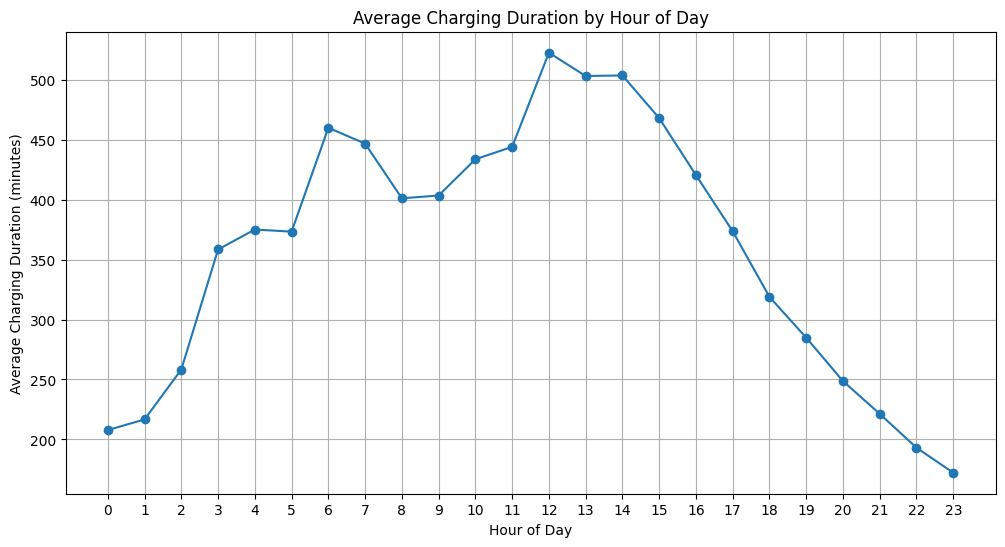

In [ ]:
# Calculate the charging duration for each session in minutes
ccs_df['charging_duration'] = (ccs_df['disconnectTime'] - ccs_df['connectionTime']).dt.total_seconds() / 60

# Group by connection hour and calculate the average charging duration
average_charging_duration = ccs_df.groupby('connection_hour')['charging_duration'].mean().reset_index()

# Rename columns for clarity
average_charging_duration.columns = ['Hour of Day', 'Average Charging Duration (minutes)']

# Plot average charging duration as a line chart
plt.figure(figsize=(12, 6))
plt.plot(average_charging_duration['Hour of Day'], average_charging_duration['Average Charging Duration (minutes)'], marker='o')
plt.title('Average Charging Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Charging Duration (minutes)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

    hour_of_day  average_daily_energy_kWh
0             0                  6.200913
1             1                  4.912829
2             2                  4.257377
3             3                  3.511691
4             4                  2.843270
5             5                  2.133910
6             6                  1.509187
7             7                  1.242620
8             8                  1.070930
9             9                  0.901593
10           10                  0.714129
11           11                  0.808102
12           12                  1.545359
13           13                  4.499889
14           14                 10.119407
15           15                 15.445057
16           16                 18.268435
17           17                 18.697974
18           18                 17.577213
19           19                 15.398233
20           20                 13.599400
21           21                 11.860770
22           22                 10

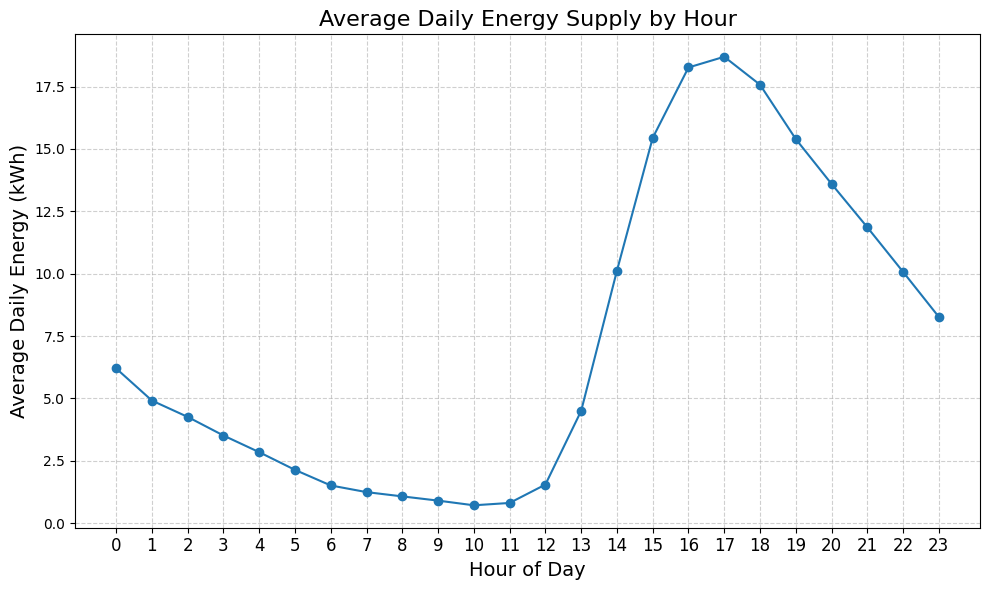

In [ ]:
# Ensure the time columns are in datetime format
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')
ccs_df['doneChargingTime'] = pd.to_datetime(ccs_df['doneChargingTime'], errors='coerce')

# Calculate the charging hour range for each session, skipping rows with NaT
ccs_df['hours_expanded'] = ccs_df.apply(
    lambda row: pd.date_range(start=row['connectionTime'], end=row['doneChargingTime'], freq='h').tolist()
    if pd.notna(row['connectionTime']) and pd.notna(row['doneChargingTime']) else [],
    axis=1
)

# Expand the hour list for each charging session
expanded_df = ccs_df.explode('hours_expanded')

# Remove rows where hours_expanded is empty
expanded_df = expanded_df[expanded_df['hours_expanded'].notnull()]

# Extract the hour_of_day column (hour of the day)
expanded_df['hour_of_day'] = expanded_df['hours_expanded'].dt.hour

# Calculate the average energy supply per hour (evenly distributed over each hour of the session)
expanded_df['energy_per_hour'] = expanded_df['kWhDelivered'] / expanded_df['hours_expanded'].groupby(expanded_df.index).transform('count')

# Calculate the total energy supply for each hour of the day
hourly_total_energy = expanded_df.groupby(['hour_of_day'])['energy_per_hour'].sum()

# Calculate the average daily energy supply per hour (divide total energy by the number of days)
# Extract the actual number of days
unique_days = expanded_df['hours_expanded'].dt.date.nunique()

# Compute the average energy supply per hour
hourly_avg_energy = hourly_total_energy / unique_days

# Convert to a DataFrame and rename columns
hourly_avg_energy_df = hourly_avg_energy.reset_index()
hourly_avg_energy_df.columns = ['hour_of_day', 'average_daily_energy_kWh']

# Output the result
print(hourly_avg_energy_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_energy_df['hour_of_day'], hourly_avg_energy_df['average_daily_energy_kWh'], marker='o')
plt.title('Average Daily Energy Supply by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Daily Energy (kWh)', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Rationale Behind Selecting Each KPI
1. Average hourly Utilization Rate
- Definition: Percentage of charging stations in use each hour.
- Reason: Measures resource efficiency and identifies peak and off-peak usage times, helping optimize operations.
- Reference: Commonly used in EV infrastructure studies to evaluate station performance.
2. Average Charging Duration
- Definition: Average duration of charging sessions per hour (in minutes).
- Reason: Indicates station turnover rates and helps reduce wait times by understanding user behavior.
- Reference: EV studies highlight charging duration as a key metric for user behavior analysis.
3. Total Energy Delivered
- Definition: Total energy delivered per hour (in kWh).
- Reason: Reflects operational revenue and demand intensity, directly tied to business performance.
- Reference: Industry practices recommend this metric for assessing station profitability and usage patterns.

### Observed Trends and Explanation
1. Average hourly Utilization Rate
- Trends: On weekdays, utilization rates peak around 30% at midnight, drop significantly in the early morning, and rise sharply from 2 PM, reaching a high of 40% between 5 PM and 10 PM. On weekends, utilization remains consistently low, with minor fluctuations around 5% throughout the day.
- Explanation: The weekday pattern reflects typical work schedules, with high activity during commute hours and low usage during work hours. On weekends, utilization remains low due to flexible schedules and reduced reliance on specific resources.
2. Average Charging Duration
- Trends: Longer durations at night and early morning, shorter during the day.
- Explanation: Reflects overnight full charges versus shorter daytime top-ups.
3. Total Energy Delivered
- Trends: Low energy use during night and morning (0:00-12:00), peaks in the afternoon, and decreases in the evening.
- Explanation: Aligns with utilization trends, highlighting concentrated energy demand during peak hours.

## (c) Site Characteristics:

   siteID  total_sessions  registered_sessions  registered_user_ratio
0       1           31592                30159               0.954640
1       2           29358                14485               0.493392


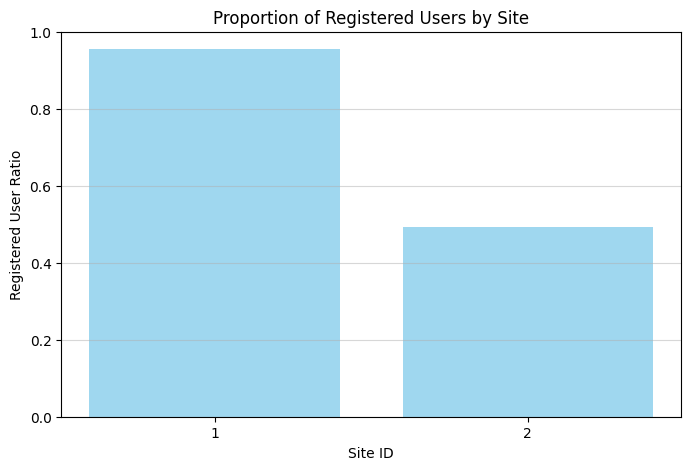

In [ ]:
# Ensure the dataset contains the 'isRegisteredUser' column
ccs_df['isRegisteredUser'] = ccs_df['userID'].notna().astype(int)  # Flag registered users

# Calculate the proportion of registered users for each siteID
site_registration_stats = ccs_df.groupby('siteID').agg(
    total_sessions=('isRegisteredUser', 'size'),  # Total number of charging sessions
    registered_sessions=('isRegisteredUser', 'sum')  # Number of charging sessions by registered users
).reset_index()

# Calculate the ratio of registered users
site_registration_stats['registered_user_ratio'] = site_registration_stats['registered_sessions'] / site_registration_stats['total_sessions']

# Print the results
print(site_registration_stats)

# Visualize the proportion of registered users
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(site_registration_stats['siteID'], site_registration_stats['registered_user_ratio'], color='skyblue', alpha=0.8)
plt.title('Proportion of Registered Users by Site')
plt.xlabel('Site ID')
plt.ylabel('Registered User Ratio')
plt.xticks(site_registration_stats['siteID'])
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.5)
plt.show()



In [ ]:
registered_sessions_time = ccs_df.groupby(['siteID', 'isRegisteredUser', ccs_df['connectionTime'].dt.month]).size().unstack(fill_value=0)
print(registered_sessions_time)


connectionTime             1     2     3     4     5     6     7     8     9   \
siteID isRegisteredUser                                                         
1      0                  100    99    89    46    87    62    86    82    70   
       1                 3241  3126  2807  2180  2427  2414  2438  2380  1727   
2      0                  275   266   188   419  1899  1955  2209  2562  2267   
       1                 1571  1359  1287  1046  1052   643  1031  1125  1106   

connectionTime             10    11    12  
siteID isRegisteredUser                    
1      0                  435   160   117  
       1                 2409  2609  2401  
2      0                 2135   479   219  
       1                 1201  1674  1390  


In [ ]:
# Data preprocessing
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'])
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'])
ccs_df['session_duration'] = (ccs_df['disconnectTime'] - ccs_df['connectionTime']).dt.total_seconds() / 3600

# Group by site and calculate key metrics
site_summary = ccs_df.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'median', 'std', 'sum', 'count'],
    'userID': pd.Series.nunique,
    'session_duration': 'mean'
}).rename(columns={'nunique': 'unique_users'})

# Rename columns for better readability
site_summary.columns = ['avg_kWh', 'median_kWh', 'std_kWh', 'total_kWh', 'session_count', 'unique_users', 'avg_duration']

# Print the results
print(site_summary)

# Determine public site characteristics
if site_summary.loc[1, 'unique_users'] < site_summary.loc[2, 'unique_users'] and site_summary.loc[1, 'avg_duration'] > site_summary.loc[2, 'avg_duration']:
    print("Site 2 is more likely to be the public charging site.")
else:
    print("Site 1 is more likely to be the public charging site.")

          avg_kWh  median_kWh    std_kWh      total_kWh  session_count  \
siteID                                                                   
1       14.163597      11.290  11.130736  447456.360717          31592   
2        8.806589       6.588   8.114406  258543.828292          29358   

        unique_users  avg_duration  
siteID                              
1                511      6.871289  
2                459      5.846944  
Site 1 is more likely to be the public charging site.


By grouping and calculating metrics by site, it becomes evident that Site 2 is more likely to be a public charging station.

The proportion of registered users at Site 1 is significantly higher than at Site 2, indicating that Site 1 is more likely a private charging station, while Site 2 is more likely a public charging station.

Public charging stations are characterized by a higher number of users and shorter charging durations per session.

In contrast, private charging stations typically have more flexible charging times with fewer restrictions, allowing for longer sessions. As a result, the average electricity consumption per session is generally much higher at private stations compared to public ones.

# 3. Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Remove rows with missing UserID
ccs_df = ccs_df.dropna(subset=['userID'])

In [ ]:
#Working with clean dataset
ccs_df.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs', 'isRegisteredUser', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable', 'modifiedAt',
       'paymentRequired', 'requestedDeparture', 'hour', 'weekday', 'quarter',
       'connection_hour', 'disconnect_hour', 'date', 'day_type',
       'hours_expanded', 'charging_duration', 'session_duration'],
      dtype='object')

In [ ]:
#Calculate the charging duration for the clustering
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'], errors='coerce')
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')

ccs_df['chargingDuration'] = ccs_df['disconnectTime'] - ccs_df['connectionTime']

<ipython-input-90-07bf345d6086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'], errors='coerce')
<ipython-input-90-07bf345d6086>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')
<ipython-input-90-07bf345d6086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
#Convert charging duration to hours
ccs_df['chargingDuration'] = ccs_df['chargingDuration'].dt.total_seconds() / 3600

<ipython-input-91-a379c860d42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['chargingDuration'] = ccs_df['chargingDuration'].dt.total_seconds() / 3600


In [ ]:
#Normalize features for K-Means algorithm

features = ccs_df[['chargingDuration','kWhDelivered','paymentRequired']].dropna()
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

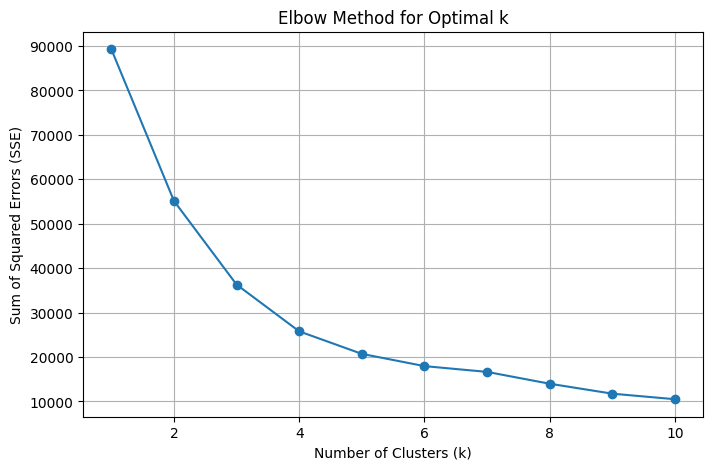

In [ ]:
sse = []

cluster_range = range(1, 11)

# Loop through cluster numbers and calculate SSE
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


We used k=3 in the k-means algorithm because it gives the best tradeoff between simplicity and data representation, capturing meaningful groups without overcomplicating the model.








In [ ]:
# Clustering -> 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
ccs_df['Cluster'] = clusters

In [ ]:
# Mean of the clusters
cluster_summary = ccs_df.groupby('Cluster').agg({'chargingDuration': 'mean','kWhDelivered': 'mean','paymentRequired': 'mean'}).reset_index()

print(cluster_summary)

   Cluster  chargingDuration  kWhDelivered paymentRequired
0        0          3.220355      8.709467             1.0
1        1          9.465419     10.214969             1.0
2        2          8.636185     34.586938             1.0


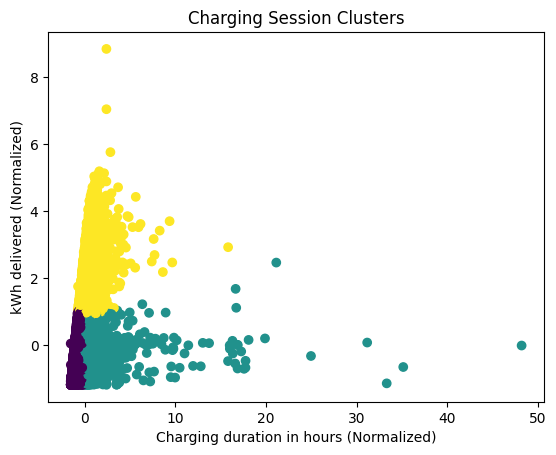

In [ ]:
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=clusters, cmap='viridis')

plt.xlabel('Charging duration in hours (Normalized)') ##Charging duration in hours
plt.ylabel('kWh delivered (Normalized)') #kWh delivered
plt.title('Charging Session Clusters')
plt.show()

### 1. Cluster: Overnight charging sessions (Green, Cluster 1)
This cluster includes charging sessions with moderate energy delivery over an extended period. These sessions are likely associated with privately owned electric vehicles, which on average consist of older models with lower maximum charging capacities. Additionally, private vehicles are often parked for longer durations, providing the opportunity for slower, complete charging cycles.


### 2. Cluster: Daily full charges (Yellow, Cluster 2)
Charging sessions in this cluster are characterized by high energy delivery over a moderate amount of time. These sessions likely belong to newer EV models equipped with advanced battery technologies capable of supporting faster charging rates.


### 3. Cluster: Quick Top-Ups (Purple, Cluster 0)
This cluster is defined by low energy delivery over a short period. Such sessions may occur during routine stops, where drivers take advantage of short breaks to briefly recharge their vehicles.

###What is the value of identifying different types of charging sessions?
Identifying different types of charging sessions provides insights into user behavior. When using this data right it could help to optimize the charging stations or improve customer satisfaction by being prepared for the customers special charging needs and preferences.

With those results one could for example incentivice costumers that were clustered in the "Overnight charging sessions" to unplug their EV earlier after being fully charged and therefore make room for new costumers.

# 4. Utilization Prediction:
## (a) predictive models

In [ ]:
print(ccs_df.columns)
ccs_df.head()

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs', 'isRegisteredUser', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable', 'modifiedAt',
       'paymentRequired', 'requestedDeparture', 'hour', 'weekday', 'quarter',
       'connection_hour', 'disconnect_hour', 'date', 'day_type',
       'hours_expanded', 'charging_duration', 'session_duration',
       'chargingDuration', 'Cluster'],
      dtype='object')


,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,quarter,connection_hour,disconnect_hour,date,day_type,hours_expanded,charging_duration,session_duration,chargingDuration,Cluster
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,...,1,13,19,2020-01-02,Weekday,"[2020-01-02 13:08:54+00:00, 2020-01-02 14:08:5...",362.350000,6.039167,6.039167,2
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,...,1,13,22,2020-01-02,Weekday,"[2020-01-02 13:36:50+00:00, 2020-01-02 14:36:5...",541.516667,9.025278,9.025278,2
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,...,1,13,0,2020-01-02,Weekday,"[2020-01-02 13:56:35+00:00, 2020-01-02 14:56:3...",642.783333,10.713056,10.713056,1
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,1,13,16,2020-01-02,Weekday,"[2020-01-02 13:59:58+00:00, 2020-01-02 14:59:5...",158.683333,2.644722,2.644722,0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,...,1,14,22,2020-01-02,Weekday,"[2020-01-02 14:00:01+00:00, 2020-01-02 15:00:0...",488.650000,8.144167,8.144167,1


In [ ]:
wb_df.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [ ]:
# Ensure all time columns are consistent (remove timezone information)
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime']).dt.tz_localize(None)
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime']).dt.tz_localize(None)
wb_df['hour'] = pd.to_datetime(wb_df['timestamp']).dt.tz_localize(None)

# Fix the weather feature extraction function
def calculate_weather_features(row):
    # Filter weather records within the time range
    relevant_weather = wb_df[
        (wb_df['hour'] >= row['connectionTime'].floor('h')) &  # Align connectionTime to the nearest hour
        (wb_df['hour'] <= row['disconnectTime'].floor('h'))   # Align disconnectTime to the nearest hour
    ]
    # If no relevant weather records are found, return NaN
    if relevant_weather.empty:
        return pd.Series({
            'avg_temperature': np.nan,
            'avg_cloud_cover': np.nan,
            'avg_pressure': np.nan,
            'avg_windspeed': np.nan,
            'avg_precipitation': np.nan,
            'avg_felt_temperature': np.nan
        })
    # Calculate statistical features
    return pd.Series({
        'avg_temperature': relevant_weather['temperature'].mean(),
        'avg_cloud_cover': relevant_weather['cloud_cover'].mean(),
        'avg_pressure': relevant_weather['pressure'].mean(),
        'avg_windspeed': relevant_weather['windspeed'].mean(),
        'avg_precipitation': relevant_weather['precipitation'].mean(),
        'avg_felt_temperature': relevant_weather['felt_temperature'].mean()
    })

# Apply the fixed function
weather_features = ccs_df.apply(calculate_weather_features, axis=1)
weather_features.columns = ['avg_temperature', 'avg_cloud_cover', 'avg_pressure',
                            'avg_windspeed', 'avg_precipitation', 'avg_felt_temperature']

# Ensure proper merging to avoid duplication
ccs_df = pd.concat([ccs_df.reset_index(drop=True), weather_features.reset_index(drop=True)], axis=1)

# Fill missing values
ccs_df.fillna(0, inplace=True)

# Remove duplicate columns
ccs_df = ccs_df.loc[:, ~ccs_df.columns.duplicated()]

ccs_df.head()



,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,charging_duration,session_duration,chargingDuration,Cluster,avg_temperature,avg_cloud_cover,avg_pressure,avg_windspeed,avg_precipitation,avg_felt_temperature
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54,2020-01-02 19:11:15,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,...,362.350000,6.039167,6.039167,2,14.166667,33.833333,986.0950,14.166667,0.0,14.166667
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50,2020-01-02 22:38:21,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,...,541.516667,9.025278,9.025278,2,15.777778,33.888889,986.0400,10.444444,0.0,15.777778
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35,2020-01-03 00:39:22,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,...,642.783333,10.713056,10.713056,1,16.090909,33.909091,986.0600,10.545455,0.0,16.090909
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58,2020-01-02 16:38:39,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,158.683333,2.644722,2.644722,0,14.333333,33.666667,985.0500,17.333333,0.0,14.333333
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01,2020-01-02 22:08:40,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,...,488.650000,8.144167,8.144167,1,16.125000,34.000000,986.2325,9.625000,0.0,16.125000


In [ ]:
print(ccs_df.columns)

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs', 'isRegisteredUser', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable', 'modifiedAt',
       'paymentRequired', 'requestedDeparture', 'hour', 'weekday', 'quarter',
       'connection_hour', 'disconnect_hour', 'date', 'day_type',
       'hours_expanded', 'charging_duration', 'session_duration',
       'chargingDuration', 'Cluster', 'avg_temperature', 'avg_cloud_cover',
       'avg_pressure', 'avg_windspeed', 'avg_precipitation',
       'avg_felt_temperature'],
      dtype='object')


In [ ]:
invalid_times = ccs_df[~pd.to_datetime(ccs_df['doneChargingTime'], errors='coerce').notnull()]
ccs_df = ccs_df[pd.to_datetime(ccs_df['doneChargingTime'], errors='coerce').notnull()]
ccs_df['doneChargingTime'] = pd.to_datetime(ccs_df['doneChargingTime'], errors='coerce')

### Model 1: Neural Network

In [ ]:
def extract_time_features(df, time_col):
    """
    Extract time features from a time column and generate cyclical encoding features.
    :param df: DataFrame containing the time column
    :param time_col: Name of the time column
    :return: Original DataFrame with added time features
    """
    # Extract basic time features
    df[f'{time_col}_hour'] = df[time_col].dt.hour  # Extract the hour from the time column
    df[f'{time_col}_weekday'] = df[time_col].dt.weekday  # Extract the weekday (0-6, Monday to Sunday)
    df[f'{time_col}_month'] = df[time_col].dt.month  # Extract the month
    df[f'{time_col}_day'] = df[time_col].dt.day  # Extract the day
    df[f'{time_col}_is_weekend'] = df[f'{time_col}_weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Check if the day is a weekend

    # Add sine and cosine cyclical features
    df[f'{time_col}_sine_hour'] = np.sin(2 * np.pi * df[f'{time_col}_hour'] / 24)  # Sine encoding for hours
    df[f'{time_col}_cosine_hour'] = np.cos(2 * np.pi * df[f'{time_col}_hour'] / 24)  # Cosine encoding for hours
    df[f'{time_col}_sine_weekday'] = np.sin(2 * np.pi * df[f'{time_col}_weekday'] / 7)  # Sine encoding for weekdays
    df[f'{time_col}_cosine_weekday'] = np.cos(2 * np.pi * df[f'{time_col}_weekday'] / 7)  # Cosine encoding for weekdays
    df[f'{time_col}_sine_month'] = np.sin(2 * np.pi * df[f'{time_col}_month'] / 12)  # Sine encoding for months
    df[f'{time_col}_cosine_month'] = np.cos(2 * np.pi * df[f'{time_col}_month'] / 12)  # Cosine encoding for months

    return df

# Extract time features for connectionTime
ccs_df = extract_time_features(ccs_df, 'connectionTime')

# Extract time features for disconnectTime
ccs_df = extract_time_features(ccs_df, 'disconnectTime')

# Extract time features for doneChargingTime
ccs_df = extract_time_features(ccs_df, 'doneChargingTime')

# View the generated time features
print(ccs_df.head())


                         id      connectionTime      disconnectTime  \
0  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54 2020-01-02 19:11:15   
1  5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50 2020-01-02 22:38:21   
2  5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35 2020-01-03 00:39:22   
3  5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58 2020-01-02 16:38:39   
4  5e23b149f9af8b5fe4b973d3 2020-01-02 14:00:01 2020-01-02 22:08:40   

           doneChargingTime  kWhDelivered  \
0 2020-01-02 17:31:35+00:00        25.016   
1 2020-01-02 20:18:05+00:00        33.097   
2 2020-01-02 16:35:06+00:00         6.521   
3 2020-01-02 15:18:45+00:00         2.355   
4 2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_193_825_2020-01-02 13:36:49.599853       1  AG-1F01  1-1-193-825   
2  1_1_193_829_2020-01-02 13:56:35.214993       1  AG-1F03  1-1-193-829   
3 

In [ ]:
# Calculate the average utilization rate by hour and day type
average_hourly_utilization = hourly_active_stations.groupby(['hours_expanded', 'day_type'])['utilization_rate'].mean().reset_index()

# Create a mapping for utilization rates by hour and day type
utilization_map = average_hourly_utilization.set_index(['hours_expanded', 'day_type'])['utilization_rate'].to_dict()

# Map utilization rate back to the original DataFrame
def map_utilization_rate(row):
    return utilization_map.get((row['connection_hour'], row['day_type']), 0)  # Default to 0 if no match

ccs_df['average_hourly_utilization'] = ccs_df.apply(map_utilization_rate, axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Select input features and target variable
features = [
    # Time features
    'connectionTime_hour', 'connectionTime_weekday', 'connectionTime_month',
    'connectionTime_sine_hour', 'connectionTime_cosine_hour',
    'disconnectTime_hour', 'disconnectTime_weekday', 'disconnectTime_month',
    'disconnectTime_sine_hour', 'disconnectTime_cosine_hour',

    # Weather features
    'avg_temperature', 'avg_cloud_cover', 'avg_pressure', 'avg_windspeed',
    'avg_precipitation', 'avg_felt_temperature',

    # Add kWhDelivered as a feature
    'kWhDelivered',

    # Categorical features
    'siteID', 'Cluster'
]

target = 'average_hourly_utilization'

# Check if features and target columns exist
missing_features = [col for col in features if col not in ccs_df.columns]
if missing_features:
    raise ValueError(f"The following feature columns are missing in ccs_df: {missing_features}")
if target not in ccs_df.columns:
    raise ValueError(f"The target column {target} is missing in ccs_df!")

# Select features and target variable
X = ccs_df[features]
y = ccs_df[target]

# Separate numeric and categorical features based on their types
numeric_features = [
    'connectionTime_hour', 'connectionTime_weekday', 'connectionTime_month',
    'connectionTime_sine_hour', 'connectionTime_cosine_hour',
    'disconnectTime_hour', 'disconnectTime_weekday', 'disconnectTime_month',
    'disconnectTime_sine_hour', 'disconnectTime_cosine_hour',
    'avg_temperature', 'avg_cloud_cover', 'avg_pressure', 'avg_windspeed',
    'avg_precipitation', 'avg_felt_temperature', 'kWhDelivered'
]
categorical_features = ['siteID', 'Cluster']
# Build the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the input features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check the shape of the processed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (35715, 22)
X_test shape: (8929, 22)


Epoch [1/50], Loss: 20.0664, Val Loss: 30.7046
Epoch [2/50], Loss: 4.6750, Val Loss: 19.9067
Epoch [3/50], Loss: 7.2959, Val Loss: 8.9892
Epoch [4/50], Loss: 28.4026, Val Loss: 4.8588
Epoch [5/50], Loss: 53.4159, Val Loss: 4.0512
Epoch [6/50], Loss: 3.0876, Val Loss: 2.6610
Epoch [7/50], Loss: 5.9943, Val Loss: 2.0187
Epoch [8/50], Loss: 5.0890, Val Loss: 1.3700
Epoch [9/50], Loss: 17.3513, Val Loss: 1.5672
Epoch [10/50], Loss: 11.7801, Val Loss: 1.0321
Epoch [11/50], Loss: 3.2802, Val Loss: 1.1077
Epoch [12/50], Loss: 3.7435, Val Loss: 1.7979
Epoch [13/50], Loss: 4.8693, Val Loss: 1.3339
Epoch [14/50], Loss: 8.2328, Val Loss: 1.8470
Epoch [15/50], Loss: 1.2187, Val Loss: 1.3862
Epoch [16/50], Loss: 3.5069, Val Loss: 1.5176
Epoch [17/50], Loss: 34.4498, Val Loss: 1.5386
Epoch [18/50], Loss: 0.4257, Val Loss: 1.3890
Epoch [19/50], Loss: 1.3844, Val Loss: 1.7488
Epoch [20/50], Loss: 0.9049, Val Loss: 1.8303
Epoch [21/50], Loss: 0.4513, Val Loss: 1.8024
Epoch [22/50], Loss: 14.3999, Val L

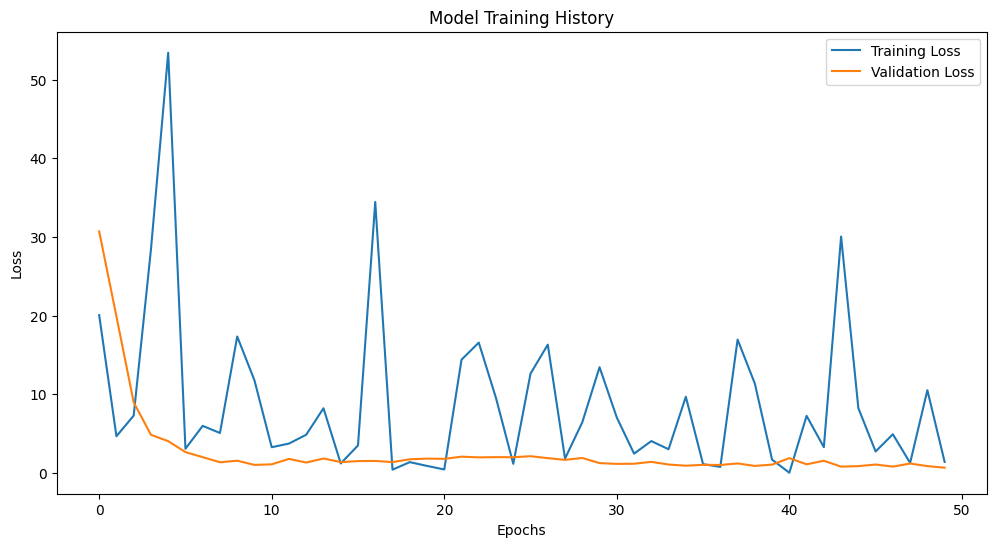

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data preprocessing
# Ensure all features are numeric and correctly divided
features = [
    'connectionTime_hour', 'connectionTime_weekday', 'connectionTime_month',
    'connectionTime_sine_hour', 'connectionTime_cosine_hour',
    'disconnectTime_hour', 'disconnectTime_weekday', 'disconnectTime_month',
    'disconnectTime_sine_hour', 'disconnectTime_cosine_hour',
    'avg_temperature', 'avg_cloud_cover', 'avg_pressure', 'avg_windspeed',
    'avg_precipitation', 'avg_felt_temperature', 'kWhDelivered','siteID','Cluster'
]
target = 'average_hourly_utilization'

# Check if features and target columns exist
missing_features = [col for col in features if col not in ccs_df.columns]
if missing_features:
    raise ValueError(f"The following feature columns are missing in ccs_df: {missing_features}")
if target not in ccs_df.columns:
    raise ValueError(f"The target column {target} is missing in ccs_df!")

# Select features and target variable
X = ccs_df[features]
y = ccs_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_dim = X_train.shape[1]
model = NeuralNetwork(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the loss
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}")

# Make predictions
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Visualize the training process
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model 2: Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Target X and features y are alreadydefined
X

,connectionTime_hour,connectionTime_weekday,connectionTime_month,connectionTime_sine_hour,connectionTime_cosine_hour,disconnectTime_hour,disconnectTime_weekday,disconnectTime_month,disconnectTime_sine_hour,disconnectTime_cosine_hour,avg_temperature,avg_cloud_cover,avg_pressure,avg_windspeed,avg_precipitation,avg_felt_temperature,kWhDelivered,siteID,Cluster
0,13,3,1,-0.258819,-0.965926,19,3,1,-0.965926,0.258819,14.166667,33.833333,986.0950,14.166667,0.0,14.166667,25.016,1,2
1,13,3,1,-0.258819,-0.965926,22,3,1,-0.500000,0.866025,15.777778,33.888889,986.0400,10.444444,0.0,15.777778,33.097,1,2
2,13,3,1,-0.258819,-0.965926,0,4,1,0.000000,1.000000,16.090909,33.909091,986.0600,10.545455,0.0,16.090909,6.521,1,1
3,13,3,1,-0.258819,-0.965926,16,3,1,-0.866025,-0.500000,14.333333,33.666667,985.0500,17.333333,0.0,14.333333,2.355,1,0
4,14,3,1,-0.500000,-0.866025,22,3,1,-0.500000,0.866025,16.125000,34.000000,986.2325,9.625000,0.0,16.125000,13.375,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44639,21,0,7,-0.707107,0.707107,1,1,7,0.258819,0.965926,29.500000,34.000000,984.7475,19.000000,0.0,28.000000,8.399,1,0
44640,21,0,7,-0.707107,0.707107,0,1,7,0.000000,1.000000,30.000000,34.000000,984.9400,18.666667,0.0,28.333333,16.864,1,0
44641,22,0,7,-0.500000,0.866025,0,1,7,0.000000,1.000000,29.500000,34.000000,984.8300,19.500000,0.0,28.000000,18.335,1,0
44642,22,0,7,-0.500000,0.866025,2,1,7,0.500000,0.866025,28.250000,34.000000,984.5825,18.500000,0.0,27.250000,22.815,1,0


In [ ]:
# Definition of the random forest model
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_depth=3,
                                 random_state=42
                                 )

In [ ]:
# Cross-validation
cv_scores_mse = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_scores_r2 = cross_val_score(rf_model, X, y, scoring='r2', cv=5)

# Average cross-validation metrics
avg_mse_cv = -np.mean(cv_scores_mse)
avg_r2_cv = np.mean(cv_scores_r2)

print(f"Cross-Validation - Average MSE: {avg_mse_cv:.4f}, Average R²: {avg_r2_cv:.4f}")

Cross-Validation - Average MSE: 7.7029, Average R²: 0.9559


In [ ]:
# Splitting dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the model
rf_model.fit(X_train_rf, y_train_rf)

# Making predictions
y_pred_rf = rf_model.predict(X_test_rf)

In [ ]:
# Evaluate predictions
mse_test = mean_squared_error(y_test, y_pred_rf)
r2_test = r2_score(y_test, y_pred_rf)

print(f"Test Set Performance - MSE: {mse_test:.4f}, R²: {r2_test:.4f}")


Test Set Performance - MSE: 6.9459, R²: 0.9610


In [ ]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

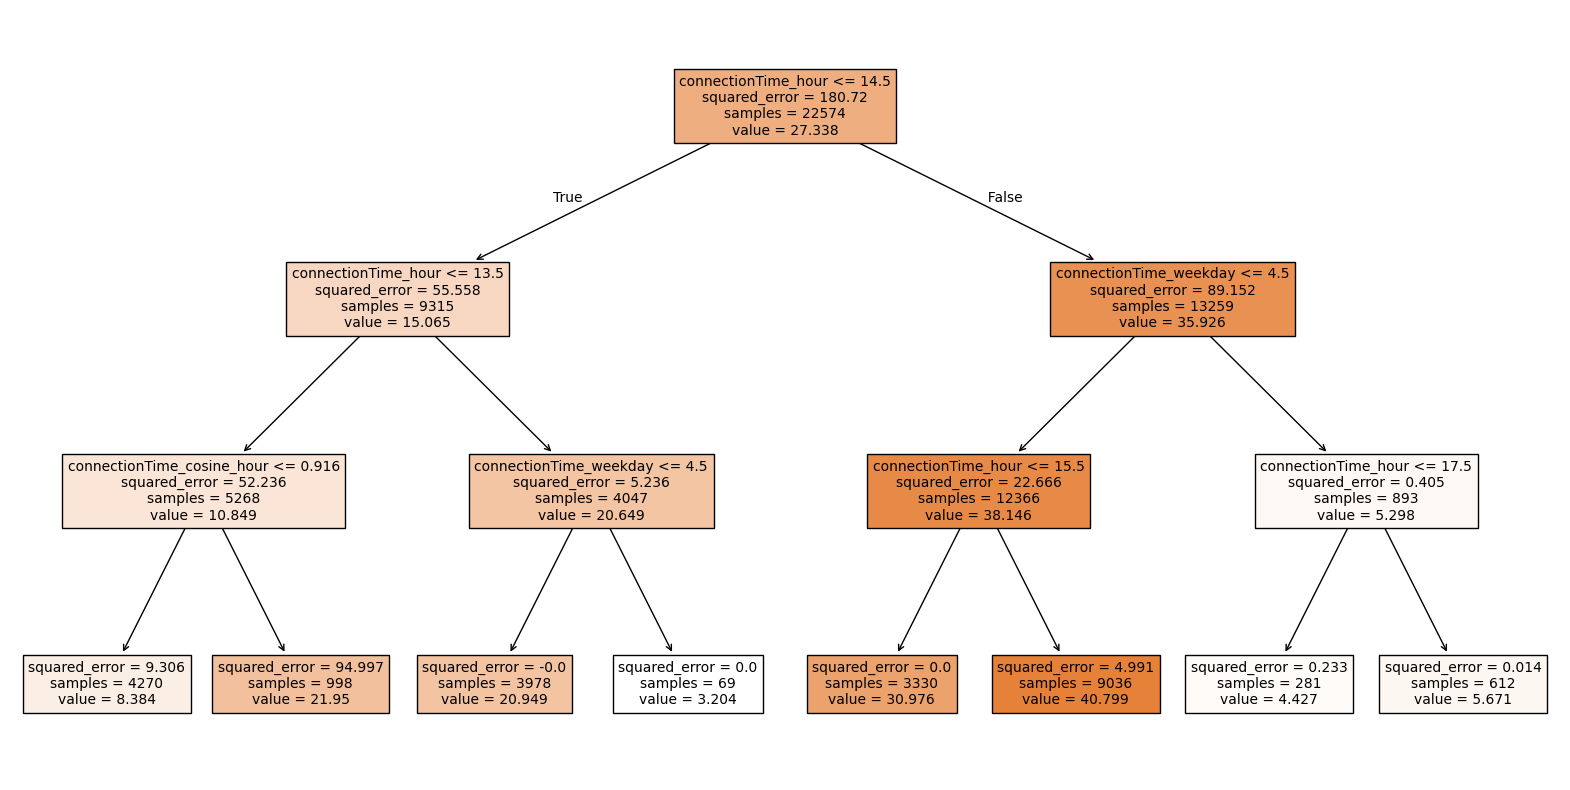

In [ ]:
# Visualisation of the first tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=features, filled=True, fontsize=10)
plt.show()

### Conclusion: Evaluation on the same holdout set

In [ ]:
# Random forest evaluation
print("Random orest:")

mse_test = mean_squared_error(y_test, y_pred_rf)
r2_test = r2_score(y_test, y_pred_rf)
print(f"Test Set Performance - MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

print("")

# Neural network evaluation
print("Neural network:")

print(f"Test Set Performance - MSE: {mse:.4f}, R²: {r2:.4f}")

Random orest:
Test Set Performance - MSE: 6.9459, R²: 0.9610

Neural network:
Test Set Performance - MSE: 0.6786, R²: 0.9962


The neural network is the better model to use because it makes more accurate predictions than the random forest. It has a much lower error and explains the data better. While the random forest is easier to understand and work with, the neural network's accuracy makes it the stronger choice if you need the best performance.

# Business Case
## Developing an EV Charging App to Visualize Utilization and Alleviate Charging Anxiety

## overview
Electric Vehicle (EV) owners often experience range anxiety. To address this issue, we propose developing an EV charging app based on the predicted utilization of charging sites. This app will enable real-time visualization of charging site utilization, recommend the best charging sites based on availability and pricing, and encourage off-peak charging via dynamic pricing strategies. Through these features, we aim to improve user experience, maximize charging site efficiency, and increase revenue.

## Core Features of the App
1. Visualization of Charging Site Utilization: Display utilization of charging sites on a user-friendly map using predictive models. Provide real-time data, such as the number of available chargers, estimated wait times, and utilization trends for the next few hours.

2. Smart Charging Recommendations: Recommend the best charging sites based on predicted utilization. Consider factors such as the user's current location, distance to the charging site, vehicle state of charge (SOC), pricing, and site availability. For long-distance travel, the app can recommend the optimal charging station path.

3. Dynamic Pricing: Implement dynamic pricing at charging sites to manage peak-hour congestion. Increase prices during high-utilization periods to reduce congestion and offer discounts during off-peak times to attract more users.

4. Prevent Long-Term Charger Occupancy: Identify users who occupy chargers for extended periods after charging is complete. Notify and reward users for unplugging promptly. For instance, during peak hours, the app can notify users when charging is complete and offer discounts if they unplug within an hour.

5. Alleviating Range Anxiety: Estimate charging time, wait time, and the range achievable with the current charging session to reduce user anxiety regarding charging availability.

## How the Predictive Model Enables the Business Case
Our predictive model can support this business case in the following ways:

1. Our predictive model can forecast hourly utilization of each charging site based on historical data, weather patterns, and user behavior, enabling more accurate site availability visualization and recommendations.

2. Using predictive models, the company can set optimal pricing based on demand, managing site utilization while maximizing revenue. For instance, utilization peaks on weekday afternoons may justify a 10% price increase, while weekday mornings and weekends with lower utilization could feature 15% discounts.

3. Long-term utilization trends can help the company decide where to add new charging sites or upgrade existing ones.

## Potential Revenue Impact:

1. Dynamic pricing can increase revenue. If Site A increases prices by 20% during peak hours and Site B attracts additional users with a 15% discount, total daily revenue could grow by 10%-15%.

2. Improved charger utilization through reducing long-term charger occupancy can increase the efficiency of each charging station. This means fewer stations are needed to meet demand, lowering maintenance costs and increasing revenue per station.

3. By providing utilization visualization, smart recommendations, and discount offers, users are more likely to choose our charging network, improving customer retention and increasing revenue.

## Limitations and Potential Risks

### 1. Prediction Model Uncertainty
• The model may fail to accurately predict utilization due to unforeseen circumstances such as traffic congestion or sudden weather changes. In reality, factors influencing charging behavior are far more complex than those addressed in this project. For example, charging behavior may also be affected by electricity prices and government policies.

• Solution: To solve the problem, we can incorporate real-time data sources (e.g., traffic flow, weather updates) to dynamically update predictions. We can also provide alternatives and clearly communicate prediction confidence ranges.

### 2. Negative effects of dynamic pricing and challenges in incentive design
• Users’ reactions to dynamic pricing may differ from expectations, leading to overcrowding at some sites or prolonged underutilization at others. Frequent price fluctuations may frustrate users, driving them to competitor networks.Besides dynamic pricing, rewarding users for timely unplugging after charging may overburden operational costs or encourage abuse of incentives (e.g., repeated plug-ins to gain rewards).

• Solution: Before implementation we can conduct A/B testing to understand user behavior deeply and refine pricing strategies by iteration. In addition we can price fluctuations within a reasonable range and clearly communicate pricing and discount strategies with customers. For insentive design, we can set reasonable reward conditions, such as requiring users to complete several compliant charging sessions to qualify for rewards. At the same time, non-monetary incentives (e.g., points, achievement badges) can be implemented to reduce operational costs.

### 3. User privacy and data security:
• Collecting user location and charging behavior data may raise privacy concerns.  

• Solution: We need to data anonymization, so that sensitive information is not directly linked to individuals. Compling with local data security laws is also necessary. We can provide clear privacy policy terms and allow users to opt-in or opt-out of data usage.

### 4. Hardware and site resource limitations:
• Some sites may have outdated hardware or lack real-time data transmission capabilities. That means we cannot reliable information from those sites.

• Solution: We can upgrade charging sites with high utilization and use IoT technology to support real-time data collection and transmission. To save cost, if the utilizaition of some charging sites is low, we can label sites with unknown equipment status within the app to help users avoid potential issues.
